In [1]:
import pandas as pd
import numpy as np

# 学习pandas透视表

## 理解index, columns和values代表的含义

In [ ]:
df = pd.DataFrame({"A": ["foo", "foo", "foo", "foo", "foo",
...                          "bar", "bar", "bar", "bar"],
...                    "B": ["one", "one", "one", "two", "two",
...                          "one", "one", "two", "two"],
...                    "C": ["small", "large", "large", "small",
...                          "small", "large", "small", "small",
...                          "large"],
...                    "D": [1, 2, 2, 3, 3, 4, 5, 6, 7]})

In [ ]:
df

In [ ]:
table = pd.pivot_table(df, values='D', index=['A', 'B'],aggfunc=np.sum)
table

In [ ]:
table = pd.pivot_table(df, values='D', index=['A', 'B'],
...                     columns=['C'], aggfunc=np.sum)
table

In [2]:
dataset = pd.read_csv(r'D:\book\decision_tree\homework\week1\CART_dataset.csv')

In [7]:
dataset

,turtorials,labs,exam
0,all,complete,74
1,some,partial,23
2,all,complete,61
3,all,complete,74
4,some,partial,25
5,all,complete,61
6,some,complete,54
7,some,partial,42
8,some,complete,55
9,all,complete,75


# 对方差的计算进行对比

In [15]:
np.std(dataset['exam']) #这里不算是正式的方差

23.680653144145609

In [16]:
np.std(dataset['exam'], ddof=1) #方差

24.511804736260679

In [17]:
dataset.groupby(['turtorials'])['exam'].std()

turtorials
all      6.742897
some    17.292420
Name: exam, dtype: float64

In [55]:
dataset.groupby(['turtorials'])['exam'].std(ddof = 0)

turtorials
all      6.155395
some    16.303450
Name: exam, dtype: float64

In [22]:
dataset

,turtorials,labs,exam
0,all,complete,74
1,some,partial,23
2,all,complete,61
3,all,complete,74
4,some,partial,25
5,all,complete,61
6,some,complete,54
7,some,partial,42
8,some,complete,55
9,all,complete,75


In [86]:
#对比上述结果，发现此时aggfunc里面的np.std又代表的是方差，所以我们要乘以n-1
turtorials_table = pd.pivot_table(dataset, values = 'exam', index='turtorials', aggfunc=[np.std, len])
turtorials_table

,std,len
,exam,exam
turtorials,,
all,6.742897,6
some,17.292420,9


In [87]:
turtorials_table = pd.pivot_table(dataset, values = 'exam', index='turtorials', aggfunc=[np.std, len])
turtorials_table.columns = ['std', 'count']
turtorials_table.reset_index(inplace=True)
turtorials_table['sum'] = turtorials_table['std'] * (turtorials_table['count'] - 1) #因为方差除的是n-1
turtorials_sum = sum(turtorials_table['sum']) / 15
turtorials_sum

11.47025631919095

In [88]:
labs_table = pd.pivot_table(dataset, values = 'exam', index='labs', aggfunc=[np.std, len])
labs_table.columns = ['std', 'count']
labs_table.reset_index(inplace=True)
labs_table['sum'] = labs_table['std'] * (labs_table['count'] - 1) #因为方差除的是n-1
labs_sum = sum(labs_table['sum']) / 15
labs_sum

8.8165242857095034

In [89]:
# 由此可见lab使得更加接近预测值，所以第一个属性选择lab

In [83]:
pd.pivot_table(data = dataset, index = 'labs', values = 'exam', columns = 'turtorials')

turtorials,all,some
labs,,
complete,69.666667,54.500000
partial,NaN,22.428571


# 创建回归树

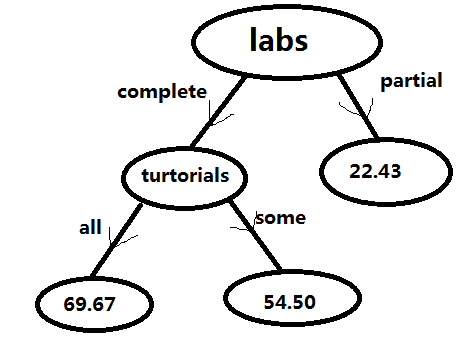